In [8]:
import torch
from PIL import Image
import os
from torch.utils.data import Dataset, DataLoader
import numpy as np

class FolderDataset(Dataset):
    """数据读取"""
    def __init__(self, main_dir, transform=None):
        self.transform = transform
        self.all_images = os.listdir(main_dir)
        self.main_dir = main_dir

    def __len__(self):
        return len(self.all_images)

    def __getitem__(self, idx):
        tensor_image=None
        img_loc = os.path.join(self.main_dir, self.all_images[idx])
        image = Image.open(img_loc).convert("RGB")
        if self.transform is not None:
            tensor_image=self.transform(image)
        else:
            raise ValueError("Transform can not be None")
    
    
        noise_factor=0.5
        noise_imgs=tensor_image+noise_factor*torch.randn(*tensor_image.shape)

        noise_imgs=np.clip(noise_imgs,0.,1.)

        return noise_imgs, tensor_image


In [2]:
import torch.nn as nn
import torch.nn.functional as F

class ConvDenoiser(nn.Module):
    """利用CNN去噪"""
    def __init__(self):
        super(ConvDenoiser, self).__init__()
        self.conv1=nn.Conv2d(3,32,3,padding=1)
        self.conv2=nn.Conv2d(32,16,3,padding=1)
        self.conv3=nn.Conv2d(16,8,3,padding=1)
        self.pool=nn.MaxPool2d(2,2)
        self.t_conv1=nn.ConvTranspose2d(8,8,3,stride=2)
        self.t_conv2=nn.ConvTranspose2d(8,16,2,stride=2)
        self.t_conv3=nn.ConvTranspose2d(16,32,2,stride=2)
        self.conv_out=nn.Conv2d(32,3,3,padding=1)

    def forward(self,x):
        x=F.relu(self.conv1(x))
        x=self.pool(x)
        x=F.relu(self.conv2(x))
        x=self.pool(x)
        x=F.relu(self.conv3(x))
        x=self.pool(x)
        x=F.relu(self.t_conv1(x))
        x=F.relu(self.t_conv2(x))
        x=F.relu(self.t_conv3(x))
        x=F.sigmoid(self.conv_out(x))

        return x
    
model=ConvDenoiser()

x=model.forward(torch.rand(1,3,68,68))
print(x.shape)

torch.Size([1, 3, 68, 68])


In [3]:
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001) 

In [ ]:
import numpy as np
import torchvision.transforms as T

print("-------------------正在创建数据集-------------------")

if torch.cuda.is_available():
    device=torch.device("cuda")
else:
    device=torch.device("cpu")

transform=T.Compose([T.Resize((68,68)),T.ToTensor()])

full_dataset=FolderDataset("E:\pyproject\TreasureVsion\common\dataset",transform=transform)

train_size=int(0.75*len(full_dataset))
val_size=len(full_dataset)-train_size
train_dataset,val_dataset=torch.utils.data.random_split(full_dataset,[train_size,val_size])
print(len(train_dataset),len(val_dataset))


batch_size=1
print("-------------------数据集创建完成-------------------")

print("-------------------创建DataLoader-------------------")

train_loader=torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
    drop_last=True
)

val_loader=torch.utils.data.DataLoader(
    dataset=val_dataset,
    batch_size=batch_size,
    shuffle=False,
    drop_last=True
)
print("-------------------DataLoader创建完成-------------------")


for noisy_imgs,noisy_images in train_dataset:
    print(f"Noisy images device: {noisy_imgs.device}")
    print(f"Images device: {noisy_images.device}")
    break



-------------------正在创建数据集-------------------
2 1
-------------------数据集创建完成-------------------
-------------------创建DataLoader-------------------
-------------------DataLoader创建完成-------------------
Noisy images device: cpu
Images device: cpu


In [24]:
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms


#加载图像


def show_fig(image): 
    """image:.tensor"""
    img_numpy=image.numpy()
    #plt是(C,H,W)格式，需要转为(C,H,W)->(H,W,C) 才能显示
    img_numpy=img_numpy.transpose((1,2,0))
    plt.imshow(img_numpy)
    plt.axis('off')
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms

tranfgorm = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

#加载图像
img_path='Apple.jpg'
image=Image.open(img_path)

img_tensor=tranfgorm(image)
print(img_tensor.shape)

img_numpy=img_tensor.numpy()
#plt是(C,H,W)格式，需要转为(C,H,W)->(H,W,C) 才能显示
img_numpy=img_numpy.transpose((1,2,0))
plt.imshow(img_numpy)
plt.axis('off')
plt.show()

torch.Size([1, 3, 68, 68])


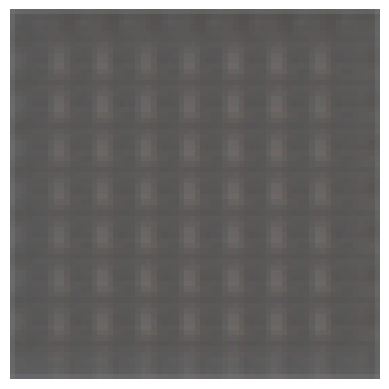

torch.Size([1, 3, 68, 68])


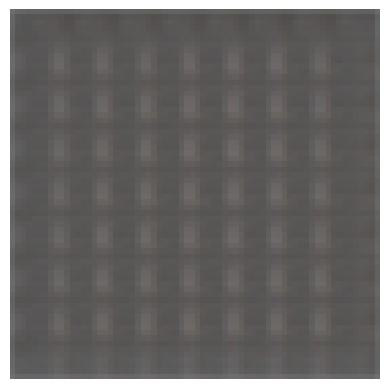

Epoch: 1 	Training Loss: 0.087083
torch.Size([1, 3, 68, 68])


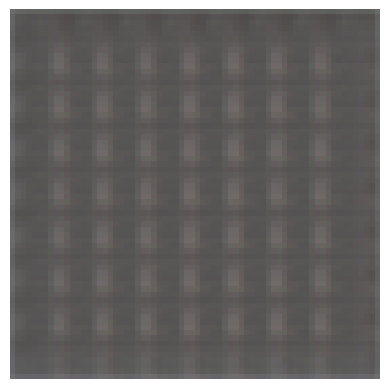

torch.Size([1, 3, 68, 68])


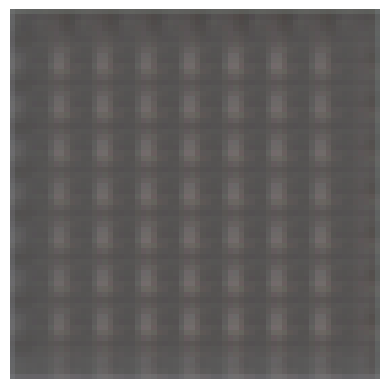

Epoch: 2 	Training Loss: 0.086287
torch.Size([1, 3, 68, 68])


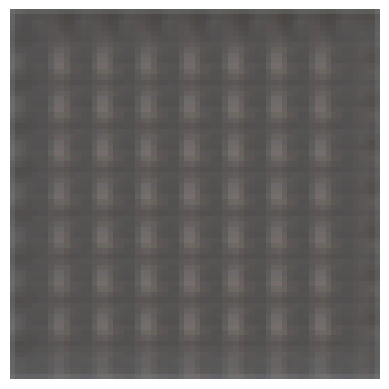

torch.Size([1, 3, 68, 68])


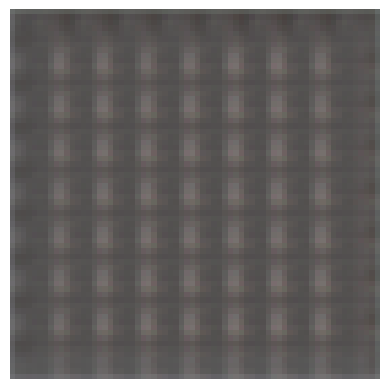

Epoch: 3 	Training Loss: 0.085402
torch.Size([1, 3, 68, 68])


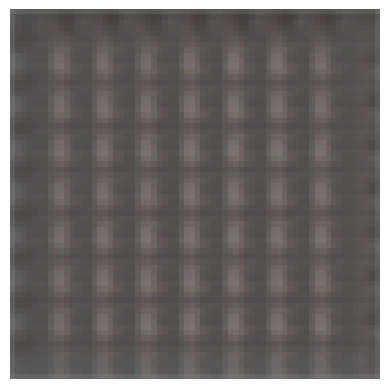

torch.Size([1, 3, 68, 68])


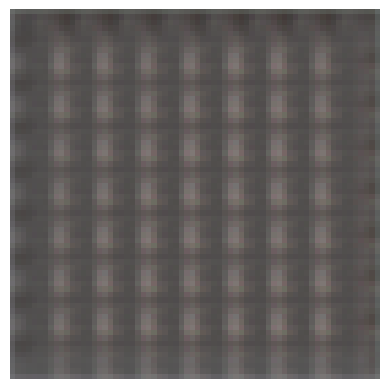

Epoch: 4 	Training Loss: 0.084375
torch.Size([1, 3, 68, 68])


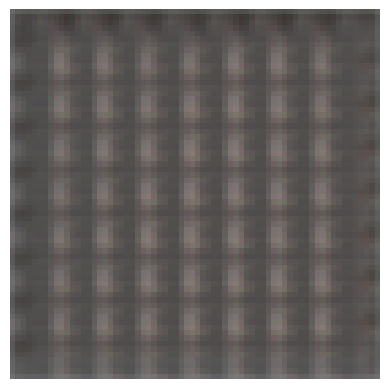

torch.Size([1, 3, 68, 68])


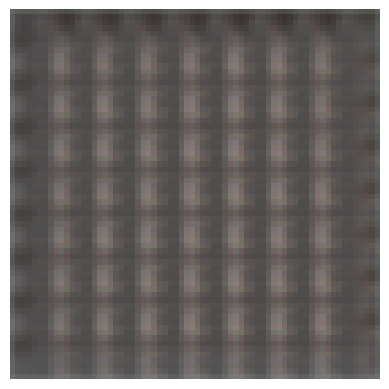

Epoch: 5 	Training Loss: 0.083237
torch.Size([1, 3, 68, 68])


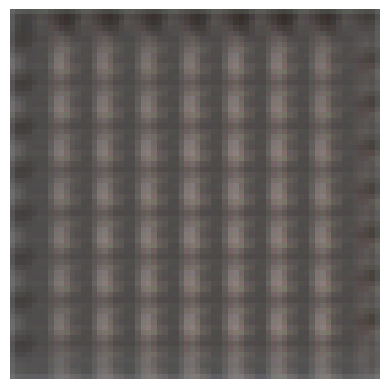

torch.Size([1, 3, 68, 68])


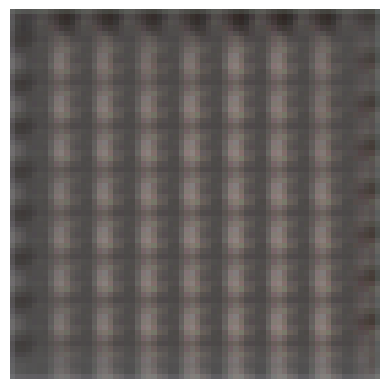

Epoch: 6 	Training Loss: 0.081470
torch.Size([1, 3, 68, 68])


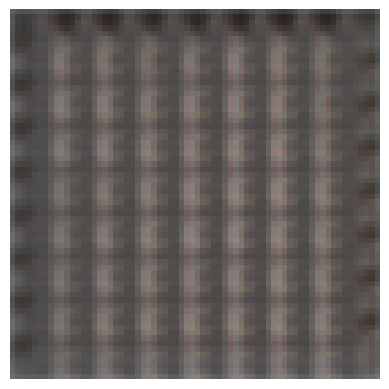

torch.Size([1, 3, 68, 68])


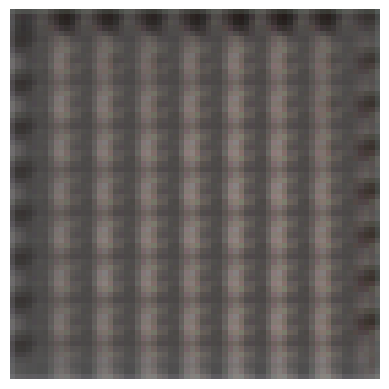

Epoch: 7 	Training Loss: 0.079319
torch.Size([1, 3, 68, 68])


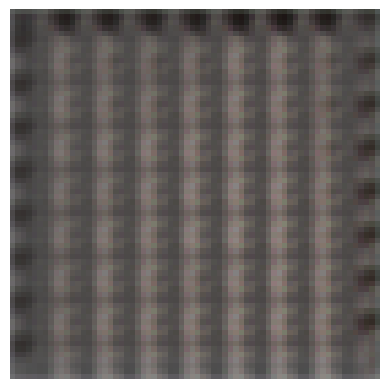

torch.Size([1, 3, 68, 68])


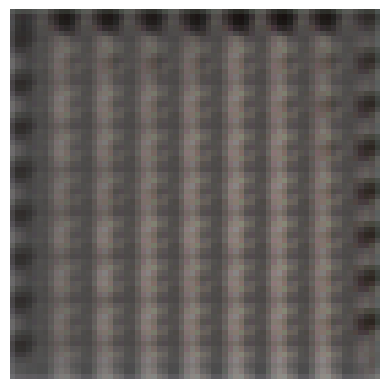

Epoch: 8 	Training Loss: 0.076564
torch.Size([1, 3, 68, 68])


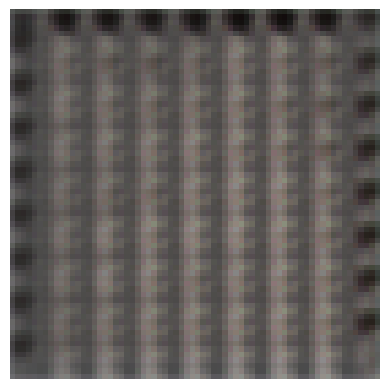

torch.Size([1, 3, 68, 68])


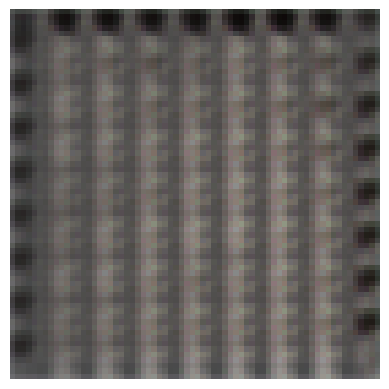

Epoch: 9 	Training Loss: 0.073713
torch.Size([1, 3, 68, 68])


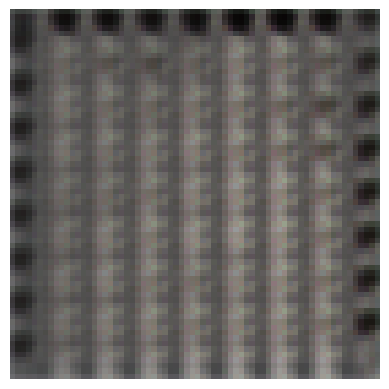

torch.Size([1, 3, 68, 68])


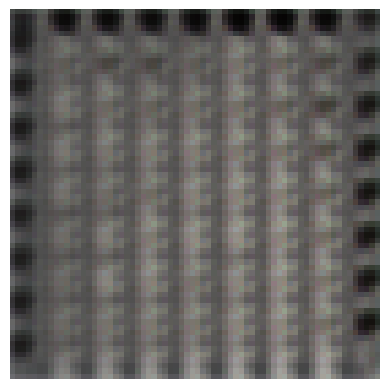

Epoch: 10 	Training Loss: 0.070022
torch.Size([1, 3, 68, 68])


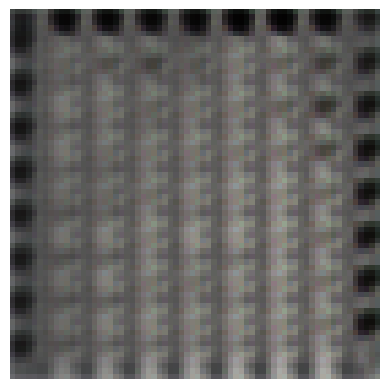

torch.Size([1, 3, 68, 68])


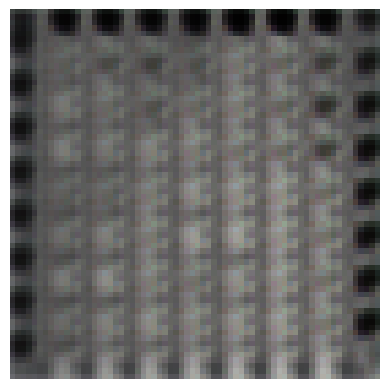

Epoch: 11 	Training Loss: 0.066016
torch.Size([1, 3, 68, 68])


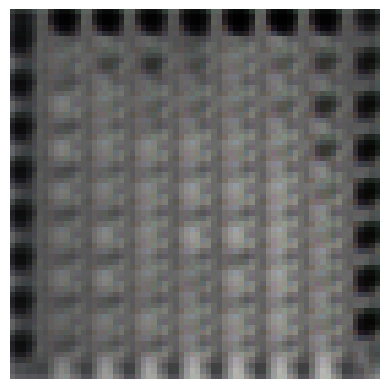

torch.Size([1, 3, 68, 68])


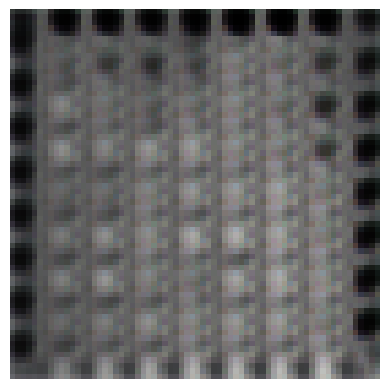

Epoch: 12 	Training Loss: 0.062548
torch.Size([1, 3, 68, 68])


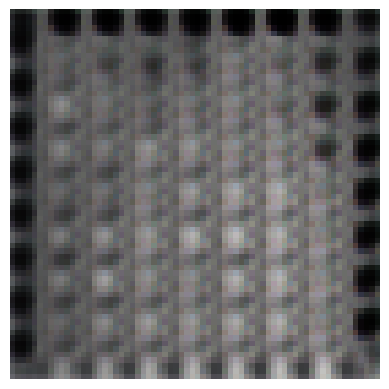

torch.Size([1, 3, 68, 68])


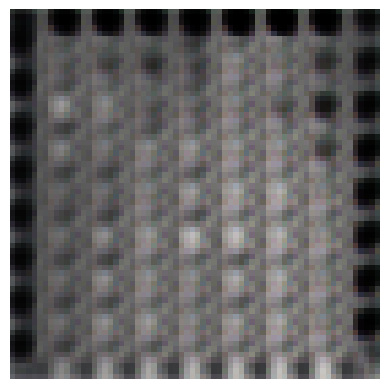

Epoch: 13 	Training Loss: 0.058839
torch.Size([1, 3, 68, 68])


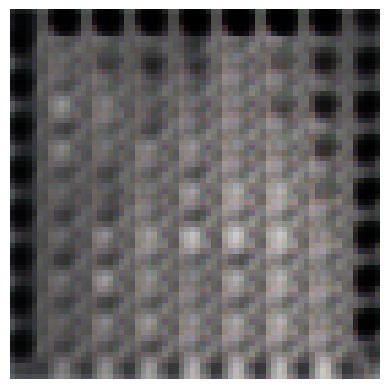

torch.Size([1, 3, 68, 68])


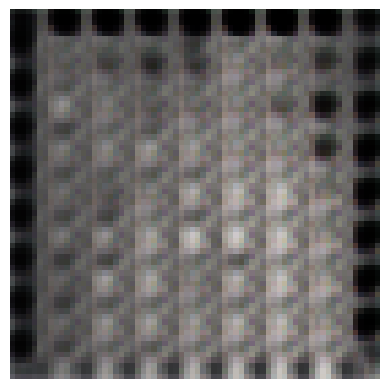

Epoch: 14 	Training Loss: 0.055102
torch.Size([1, 3, 68, 68])


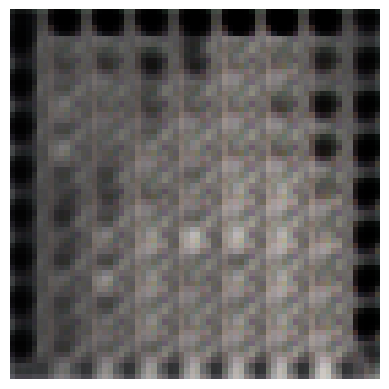

torch.Size([1, 3, 68, 68])


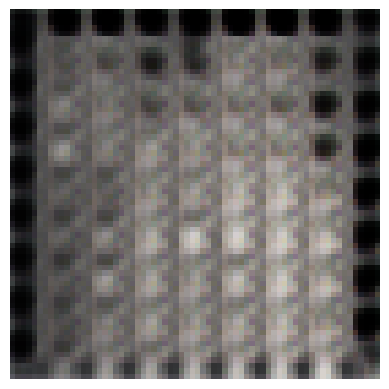

Epoch: 15 	Training Loss: 0.052356
torch.Size([1, 3, 68, 68])


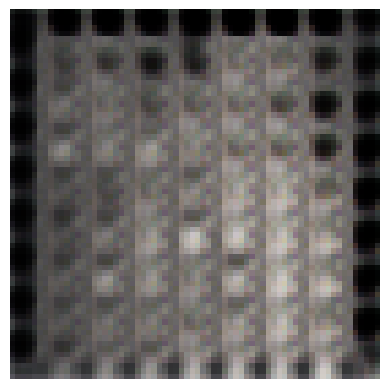

torch.Size([1, 3, 68, 68])


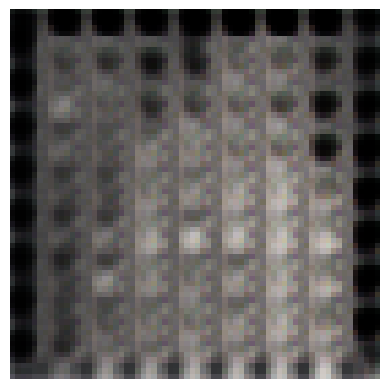

Epoch: 16 	Training Loss: 0.049667
torch.Size([1, 3, 68, 68])


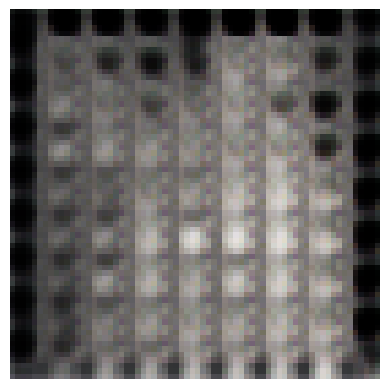

torch.Size([1, 3, 68, 68])


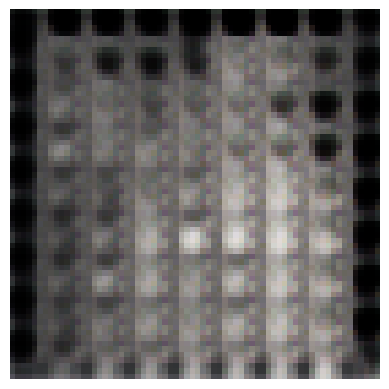

Epoch: 17 	Training Loss: 0.047724
torch.Size([1, 3, 68, 68])


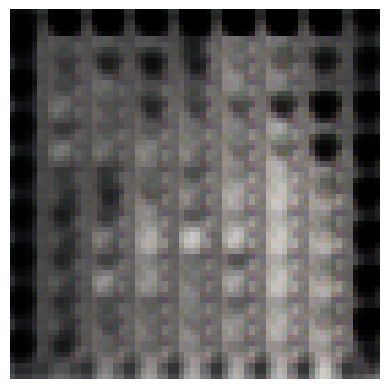

torch.Size([1, 3, 68, 68])


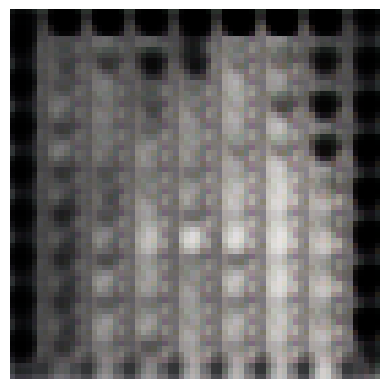

Epoch: 18 	Training Loss: 0.045041
torch.Size([1, 3, 68, 68])


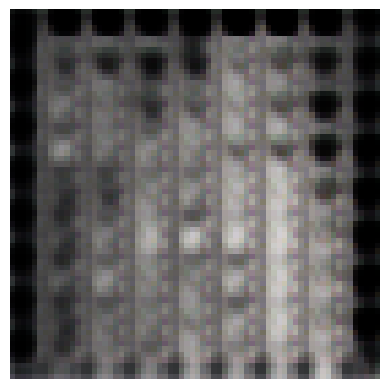

torch.Size([1, 3, 68, 68])


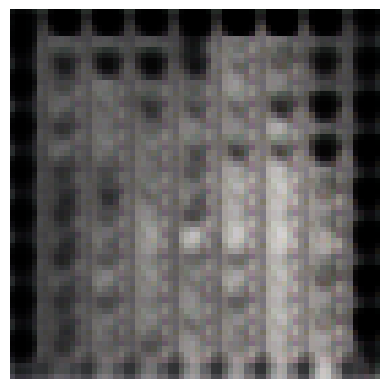

Epoch: 19 	Training Loss: 0.043347
torch.Size([1, 3, 68, 68])


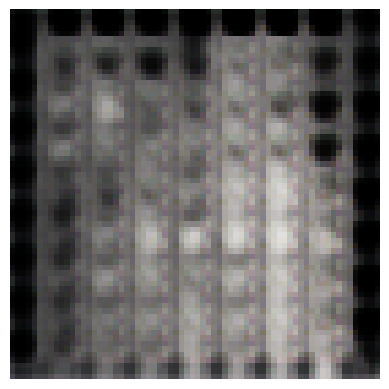

torch.Size([1, 3, 68, 68])


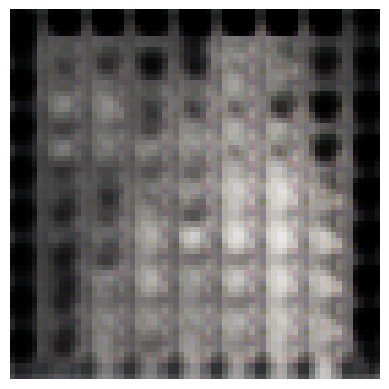

Epoch: 20 	Training Loss: 0.041675


In [25]:
n_epochs=20

noise_factor=0.5

model.to(device)

for epoch in range(1,n_epochs+1):
    train_loss=0.0


    for noisy_imgs,images in train_loader:
    
        noisy_imgs=noisy_imgs.to(device)
        images=images.to(device)

        optimizer.zero_grad()
        outputs=model(noisy_imgs)
        print(outputs.shape)
        show_fig(outputs.detach().cpu()[0])
        loss=criterion(outputs,images)
        loss.backward()
        optimizer.step()

        train_loss+=loss.item()*images.size(0)
    train_loss=train_loss/len(train_loader)
    print(f"Epoch: {epoch} \tTraining Loss: {train_loss:.6f}")

测试集 images 形状:  torch.Size([1, 3, 68, 68])
测试集 noisy_images 形状:  torch.Size([1, 3, 68, 68])
测试集输出结果 output 形状:  torch.Size([1, 3, 68, 68])
noisy_imgs 转换为 numpy 数组后的形状:  (1, 3, 68, 68)
output 转换为 numpy 数组后的形状:  (1, 3, 68, 68)
output 的通道维度移到最后一维后的形状:  (1, 68, 68, 3)
original_image shape:  (1, 68, 68, 3)


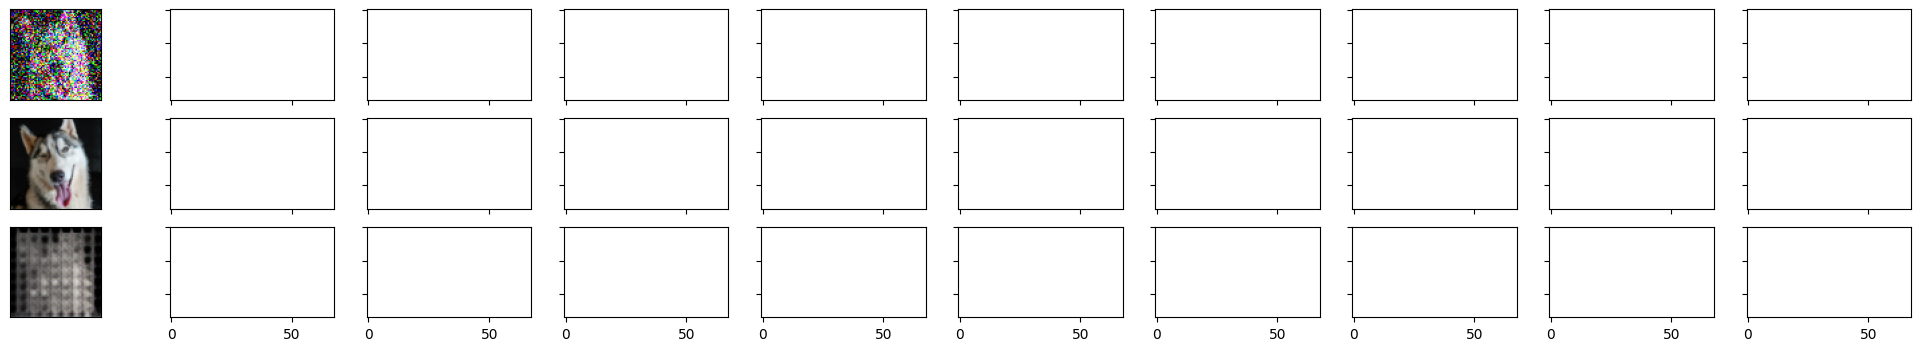

In [26]:
import matplotlib.pyplot as plt  # 导入 matplotlib 库，用于绘图
%matplotlib inline
# 在 Jupyter Notebook 中内嵌显示图像

# 从验证数据加载器中获取一个批次的测试图像
dataiter = iter(val_loader)  # 创建验证数据加载器的迭代器
noisy_images, original_images = next(dataiter)  # 获取下一个批次的数据（图像和标签）

print("测试集 images 形状: ", noisy_images.shape)  # 打印图像的形状，通常是 (batch_size, channels, height, width)

model = model.to(device)  # 将模型移动到指定的设备

noisy_images = noisy_images.to(device)  # 将噪声图像移动到指定的设备


print("测试集 noisy_images 形状: ", noisy_images.shape)  # 打印图像的形状，通常是 (batch_size, channels, height, width)

# 获取模型的输出（去噪后的图像）
output = model(noisy_images)  # 将噪声图像输入模型，得到去噪后的输出
print("测试集输出结果 output 形状: ", output.shape)  # 打印输出的形状，通常是 (batch_size, channels, height, width)

# 准备噪声图像用于显示
noisy_images = noisy_images.cpu().numpy()  # 将噪声图像从 PyTorch 张量转换为 NumPy 数组
print('noisy_imgs 转换为 numpy 数组后的形状: ', noisy_images.shape)  # 打印噪声图像的形状
noisy_images = np.moveaxis(noisy_images, 1, -1)  # 调整维度顺序，将通道维度移到最后一维，适配 matplotlib 的显示格式

# 将输出调整为批次图像的形状
output = output.view(batch_size, 3, 68, 68)  # 将输出张量调整为 (batch_size, channels, height, width) 的形状
# 使用 detach() 分离梯度信息，并将其转换为 NumPy 数组
output = output.detach().cpu().numpy()  # 将输出从 PyTorch 张量转换为 NumPy 数组
print('output 转换为 numpy 数组后的形状: ', output.shape)  # 打印输出的形状
output = np.moveaxis(output, 1, -1)  # 调整维度顺序，将通道维度移到最后一维，适配 matplotlib 的显示格式
print('output 的通道维度移到最后一维后的形状: ', output.shape)  # 打印调整后的输出形状

original_images = original_images.cpu().numpy().transpose((0, 2, 3, 1))
print("original_image shape: ", original_images.shape)

# 绘制前 10 张输入图像和重建图像
fig, axes = plt.subplots(nrows=3, ncols=10, sharex=True, sharey=True, figsize=(25,4))  # 创建 2 行 10 列的子图
# 第一行显示噪声图像，第二行显示重建图像
for imgs, row in zip([noisy_images, original_images, output], axes):  # 遍历噪声图像和重建图像
    for img, ax in zip(imgs, row):  # 遍历每张图像和对应的子图
        ax.imshow(np.squeeze(img))  # 显示图像，并去除多余的维度
        ax.get_xaxis().set_visible(False)  # 隐藏 x 轴
        ax.get_yaxis().set_visible(False)  # 隐藏 y 轴
plt.show()  # 显示图像
